## YouTube API Info
Costs:
- Search: 100 credits per request (1-50 videos)
- Video Details: 1 credit per request (1-50 videos)
- Comment Threads: 1 credit per request (1-100 comment threads)

Quota: 10,000 credits per day
- Search: max 5,000 videos per day
- Video Details: max 500,000 videos per day
- Comment Threads: max 1,000,000 comment threads per day

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
from dotenv import load_dotenv
from tqdm import tqdm
from datetime import datetime

from youtube_helper import YouTubeHelper

In [2]:
DATA_DIR = Path.cwd() / 'content'
COMMENTS_DIR = DATA_DIR / 'video_comments'
SEARCH_DIR = DATA_DIR / 'video_search'

In [3]:
yt = YouTubeHelper()

### Example

In [ ]:
start_date_ex = pd.to_datetime('2019-01-01')
end_date_ex = start_date_ex + pd.DateOffset(months=1)

print(start_date_ex, "-", end_date_ex)

results_ex = yt.search(
    "한국 핵무장",
    start_date=start_date_ex,
    end_date=end_date_ex,
    order_by="rating",
    results_to_get=50,
)

results_ex['query'] = '한국 핵무장'

In [ ]:
print(len(results_ex))
results_ex

### Pipeline

- 한국 핵무장
- 한국 핵개발


In [4]:
results = yt.rolling_search(
    query="한국 핵개발",
    start_date=pd.to_datetime('2023-04-01'),
    window_size=3, # in months
    num_windows=34, # num_windows * window_size = total months
    results_per_window=50,
    direction='backward',
    # test_dates=True,
)

Searching for '한국 핵개발' from 2014-07-01 00:00:00 to 2014-09-30 23:59:59: 100%|██████████| 35/35 [00:16<00:00,  2.13it/s]


In [5]:
results.to_csv(SEARCH_DIR / f"search_results_{datetime.now().strftime('%Y%m%d-%H%M')}.csv", index=False)

In [7]:
len(results)

1750

In [ ]:
# search_results_20230501-0122.csv
# search_results_20230501-2312.csv

In [8]:
results.window_start.min(), results.window_end.max()

('2014-07-01 00:00:00', '2023-03-31 23:59:59')

In [6]:
results.head()

,published_at,video_id,video_title,video_description,channel_id,channel_title,etag,window_start,window_end,query,collection_date
0,2023-03-09T11:47:45Z,Yr3h485MeTM,&quot;한국이 핵 개발해도 미국이 강력 반대 안 할 듯&quot; [인사이드 경...,"북한이 핵과 미사일 능력을 급속도로 고도화하고, 핵탄두를 기하급수적으로 늘리겠다고 ...",UCcQTRi69dsVYHN3exePtZ1A,KBS News,27Lg9DERApxiU5icak9PoTWFo_s,2023-01-01 00:00:00,2023-03-31 23:59:59,한국 핵개발,2023-05-01 23:12:21
1,2023-01-04T06:49:15Z,pbst6XB7GVY,[자막뉴스] &quot;한국은 핵 보유국이...&quot; 미국의 강력한 한마디 /...,백악관은 조 바이든 대통령이 한미 핵 공동 연습 계획이 없다고 말한 건 한국이 핵 ...,UChlgI3UHCOnwUGzWzbJ3H5w,YTN,hU8KD_na2w9R33OfLvieuhudVss,2023-01-01 00:00:00,2023-03-31 23:59:59,한국 핵개발,2023-05-01 23:12:21
2,2023-02-02T05:46:30Z,fYX_Mru5tNw,"[자막뉴스] &quot;한국 핵무장, 전 세계 소프트파워 파괴&quot; 강력한 경...",미국의 지그프리드 해커 박사는 한국의 핵무장을 주제로 한 세미나에서 한국의 과학기술...,UChlgI3UHCOnwUGzWzbJ3H5w,YTN,bncw-sVYhft26xeyu4AM6BZbvxo,2023-01-01 00:00:00,2023-03-31 23:59:59,한국 핵개발,2023-05-01 23:12:21
3,2023-01-30T10:36:06Z,pOXePZ3o07s,북핵 위협 고조 속 국민 76.6% &quot;한국 독자적 핵개발 필요&quot; ...,"북핵 위협 고조 속 국민 76.6% ""한국 독자적 핵개발 필요"" 북한의 핵·미사일 ...",UCTHCOPwqNfZ0uiKOvFyhGwg,연합뉴스TV,pfZ8gXrj68sLOHXdCEDK77wjqqQ,2023-01-01 00:00:00,2023-03-31 23:59:59,한국 핵개발,2023-05-01 23:12:21
4,2023-02-17T11:54:00Z,iaPbuz2pjoQ,북한의 연이은 미사일 도발...거세지는 한국의 독자 핵무장론 파헤쳐 봄 (ft. 마...,비디오머그 #핵무장 #북한 안녕하세요. SBS 통일외교팀장 김수형 기자입니다. 떠들...,UCMEbRpvuwTbXxGiyDb1mT8w,비디오머그 - VIDEOMUG,iwrmq3WfApH2vMoeFif1SRs4VA8,2023-01-01 00:00:00,2023-03-31 23:59:59,한국 핵개발,2023-05-01 23:12:21


In [4]:
results = pd.read_csv(SEARCH_DIR / 'search_results_20230501-0122.csv')

### Get Details

In [10]:
results.head(1)

,published_at,video_id,video_title,video_description,channel_id,channel_title,etag,window_start,window_end,query,collection_date
0,2023-03-09T11:47:45Z,Yr3h485MeTM,&quot;한국이 핵 개발해도 미국이 강력 반대 안 할 듯&quot; [인사이드 경...,"북한이 핵과 미사일 능력을 급속도로 고도화하고, 핵탄두를 기하급수적으로 늘리겠다고 ...",UCcQTRi69dsVYHN3exePtZ1A,KBS News,27Lg9DERApxiU5icak9PoTWFo_s,2023-01-01 00:00:00,2023-03-31 23:59:59,한국 핵개발,2023-05-01 23:12:21


In [11]:
id_list = results['video_id'].tolist()

In [12]:
details = yt.video_details(id_list)

In [13]:
# total comment count
details['comment_count'].sum()

444738

In [14]:
# map window_start, window_end, query, and collection date from results to details
details['window_start'] = details['video_id'].map(results.set_index('video_id')['window_start'])
details['window_end'] = details['video_id'].map(results.set_index('video_id')['window_end'])
details['query'] = details['video_id'].map(results.set_index('video_id')['query'])
details['collection_date'] = details['video_id'].map(results.set_index('video_id')['collection_date'])

In [16]:
print(len(details))
details.head(1)

1750


,published_at,video_id,video_title,video_description,channel_id,channel_title,tags,category_id,duration,view_count,like_count,comment_count,regions_blocked,regions_allowed,content_rating,etag,window_start,window_end,query,collection_date
0,2023-03-09T11:47:45Z,Yr3h485MeTM,"""한국이 핵 개발해도 미국이 강력 반대 안 할 듯"" [인사이드 경인] / KBS 2...","북한이 핵과 미사일 능력을 급속도로 고도화하고, 핵탄두를 기하급수적으로 늘리겠다고 ...",UCcQTRi69dsVYHN3exePtZ1A,KBS News,"[북한, 미국, 핵개발]",25,PT7M46S,234495,2149,1422,NaN,None,None,QBIAOKun21M0a5rURdQ-c2pW3bk,2023-01-01 00:00:00,2023-03-31 23:59:59,한국 핵개발,2023-05-01 23:12:21


In [23]:
details.iloc.to_csv(SEARCH_DIR / 'video_details_20230501-2312.csv', index=False)

In [27]:
details1 = pd.read_csv(SEARCH_DIR / 'video_details_20230501-0122.csv')
details2 = pd.read_csv(SEARCH_DIR / 'video_details_20230501-2312.csv')
print(len(details1))
print(len(details2))

# combine details1 and details2 into one dataframe with unique video_id
details_full = pd.concat([details1, details2]).drop_duplicates(subset='video_id')
print(len(details_full))

1700
1700
2924


In [31]:
details_full.to_csv(DATA_DIR / 'video_details_full.csv', index=False)

### EDA

In [28]:
# sort by highest view count
details_full.sort_values(by='view_count', ascending=False).head()

,published_at,video_id,video_title,video_description,channel_id,channel_title,tags,category_id,duration,view_count,like_count,comment_count,regions_blocked,regions_allowed,content_rating,etag,window_start,window_end,query,collection_date
219,2022-03-01T20:49:51Z,FxFS00wg84M,"러시아 실제 핵폭탄 폭발 순간 (구 소련, 1961)","1961년 소련에서 실제로 폭발 실험한 핵폭탄, 차르봄바\n인류 역사상 가장 강력한...",UCdqeRp0IA8zcIoR6KM1_9kw,1분 지식의 힘,NaN,25,PT1M,10783999,100349.0,7539.0,NaN,NaN,NaN,mWTNaWSepY_GX-Nwi_qXcfyR1Uk,2022-01-01 00:00:00,2022-03-31 23:59:59,한국 핵개발,2023-05-01 23:12:21
477,2020-10-22T13:00:11Z,1rkSmp3J2BE,★밀리터리 아카이브★ 육해공 한국형 첨단무기 개발현장 밀착 다큐! | 수리온 K2전...,"※ 본 영상은 2010년 방송된 것으로, 무기의 명칭이나 실전배치 일정 등 현재의 ...",UC4LW3sOslC14Vn5bcoNUBkg,KBS 다큐,"['KBS', '다큐멘터리', 'docu', 'documentary', '다큐', ...",24,PT58M2S,8824645,57422.0,2536.0,NaN,NaN,NaN,ieIc-T32ikRyW79n7Fenwfxpjkw,2020-10-01 00:00:00,2020-12-31 23:59:59,한국 핵개발,2023-05-01 23:12:21
764,2019-04-11T12:53:49Z,l8yLj_dNViA,자신을 촬영하는 민간인에게 총을 꺼낸 미국 경찰,"캘리포니아, 로너트 파크 경찰관, 로드리게스의 행동이 지역사회에 큰 논란을 일으켰다...",UCU3GJUUpyYRx6aC9RuJH7GQ,트루퍼미헌,"['미국경찰', '미국경찰관', '트루퍼미헌']",25,PT6M10S,7172154,32577.0,5713.0,NaN,NaN,NaN,C5wRvuP7UkOfG4qduUKGQWq471M,2019-04-01 00:00:00,2019-06-30 23:59:59,한국 핵개발,2023-05-01 23:12:21
346,2021-08-16T07:05:34Z,eYj4Yw_hBAk,[통합판] 🔥Korea Military🔥 몰아보기 ㅣ뉴스멘터리 전쟁과 사람 / YTN2,#전투기보라매#K9자주포#미사일주권#미사일방어체계#KF21\n 우리 손으로 만든 첫...,UCDww6ExpwQS0TzmREIOo40Q,YTN2,"['KF-21 보라매', '국사력', 'K-9 자주포', '국방력', 'K9자주포'...",24,PT3H6M1S,6832549,41246.0,2125.0,NaN,NaN,NaN,dVdKT1ztBOs1_H6qfubElGThYXg,2021-07-01 00:00:00,2021-09-30 23:59:59,한국 핵개발,2023-05-01 23:12:21
1082,2017-10-31T12:01:01Z,qBfyIQbxXPs,Inside North Korea's bubble in Japan,Why North Korea has children’s schools in Japa...,UCLXo7UDZvByw2ixzpQCufnA,Vox,"['vox.com', 'vox', 'explain', 'vox borders', '...",25,PT13M28S,6692426,142861.0,13635.0,NaN,NaN,NaN,V73g7EbSuUeJIY3jwq9obCVeiH4,2017-10-01 00:00:00,2017-12-31 23:59:59,한국 핵개발,2023-05-01 23:12:21


<Axes: ylabel='Frequency'>

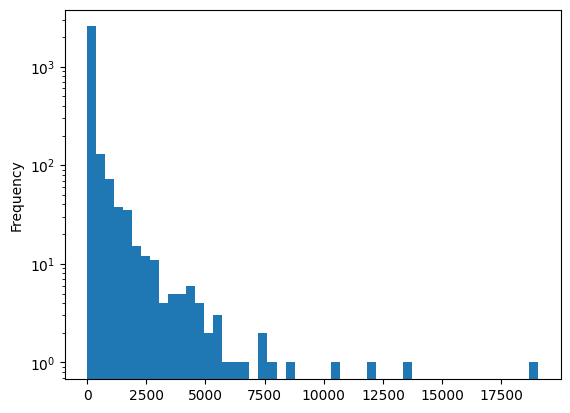

In [29]:
# plot the view count distribution on x-axis
details_full['comment_count'].plot.hist(bins=50, logy=True)